# ML Assignment – HR CHURN PREDICTION

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('HR_Data.csv')
df

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined
8994,12333,3836076,No,2,0,E1,45.25,14.09,-21.45,No,No,Female,Employee Referral,1,INFRA,Chennai,34,Joined
8995,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8996,11882,3664089,No,5,0,E2,20.00,10.00,-8.33,No,No,Male,Direct,8,ETS,Noida,34,Joined


## Clean the dataset

In [3]:
print(df.isnull().sum())

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64


In [4]:
df.describe()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
count,8998.000000,8.998000e+03,8998.000000,8998.000000,8998.000000,8998.00000,8998.000000,8998.000000,8998.000000
mean,5972.247722,2.843815e+06,21.428762,39.282063,43.877143,40.66886,-1.574809,4.239053,29.913647
std,3374.652978,4.864595e+05,25.809202,22.224471,29.826113,36.09506,19.607638,2.547685,4.097889
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.53000,-67.270000,0.000000,20.000000
25%,3208.250000,2.386508e+06,3.000000,30.000000,27.270000,22.09000,-8.330000,3.000000,27.000000
50%,5976.500000,2.807490e+06,10.000000,30.000000,40.000000,36.00000,0.000000,4.000000,29.000000
75%,8744.000000,3.300062e+06,33.000000,60.000000,53.850000,50.00000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.43000,300.000000,24.000000,60.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8998 non-null   int64  
 1   Candidate.Ref                8998 non-null   int64  
 2   DOJ.Extended                 8998 non-null   object 
 3   Duration.to.accept.offer     8998 non-null   int64  
 4   Notice.period                8998 non-null   int64  
 5   Offered.band                 8998 non-null   object 
 6   Pecent.hike.expected.in.CTC  8998 non-null   float64
 7   Percent.hike.offered.in.CTC  8998 non-null   float64
 8   Percent.difference.CTC       8998 non-null   float64
 9   Joining.Bonus                8998 non-null   object 
 10  Candidate.relocate.actual    8998 non-null   object 
 11  Gender                       8998 non-null   object 
 12  Candidate.Source             8998 non-null   object 
 13  Rex.in.Yrs        

In [6]:
df.groupby('Status').count()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age
Status,,,,,,,,,,,,,,,,,
Joined,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316
Not Joined,1682,1682,1682,1682,1682,1682,1682,1682,1682,1682,1682,1682,1682,1682,1682,1682,1682


In [7]:
df7 = df['Status']

In [8]:
df7 = pd.get_dummies(df7,drop_first=True)

In [9]:
df1 = pd.merge(df, df7, left_index = True, right_index = True)

In [10]:
#checking duplicates
sum(df1.duplicated(subset = 'SLNO'))
# having duplicate values

3

In [11]:
df1.drop_duplicates(subset ="SLNO",keep = False, inplace = True) 

# Exploratory Data Analysis

<img src='https://static.wixstatic.com/media/e42cce_756b090fe40548eda9148fd5599980bb~mv2.gif' width='450'>

In [12]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns

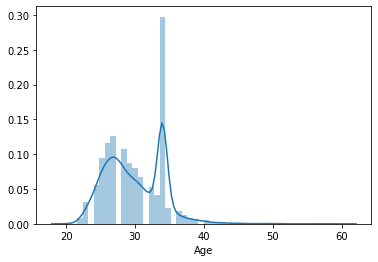

In [13]:
sns.distplot(df1['Age'])

- by this chart we can say that the age of candidate is in between 22-40 and candidate with approx age 35 is of most.

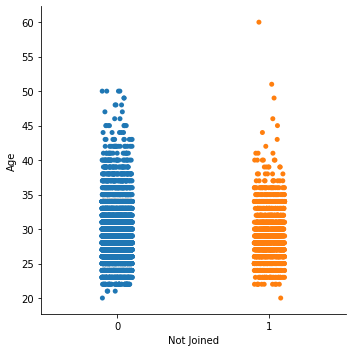

In [14]:
sns.catplot("Not Joined",'Age',data = df1)

- by this chart we can say that as the increase in age the chances of joining of job is more.

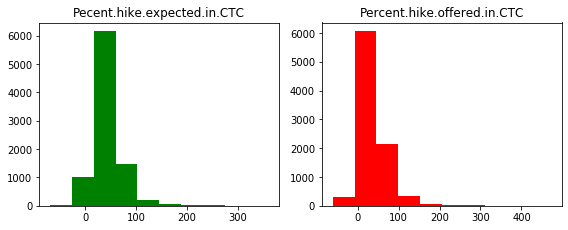

In [15]:
hike = plt.figure(figsize = (8,6))

g1 = hike.add_subplot(2,2,1) 
g2 = hike.add_subplot(2,2,2)

g1.hist(df1['Pecent.hike.expected.in.CTC'], color = 'green')
g1.set_title('Pecent.hike.expected.in.CTC')

g2.hist(df1['Percent.hike.offered.in.CTC'], color = 'red')
g2.set_title('Percent.hike.offered.in.CTC')

plt.tight_layout() 
plt.show()

- by these charts we can say that if the hike expected is almost same as the hike offered the chances of cndidate joining the job is more.

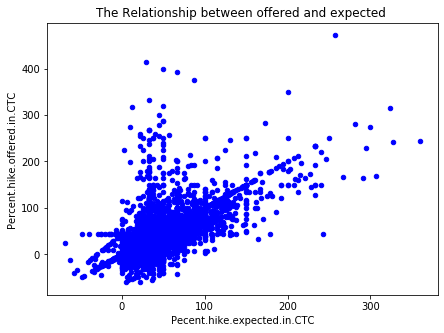

In [16]:
scatter_age_balance = df1.plot.scatter('Pecent.hike.expected.in.CTC','Percent.hike.offered.in.CTC',color = 'blue',figsize = (7,5))

plt.title('The Relationship between offered and expected ')
plt.show()

- by this scatter chart we can say that all the data points are mainly focus in between 0-150.

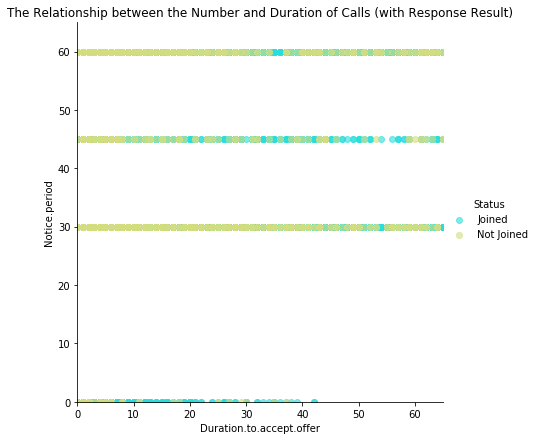

In [17]:
dur_cam = sns.lmplot(x='Duration.to.accept.offer', y='Notice.period',data = df1,hue = 'Status',fit_reg = False,scatter_kws={'alpha':0.6},palette = 'rainbow', height =6)

plt.axis([0,65,0,65])
plt.ylabel('Notice.period')
plt.xlabel('Duration.to.accept.offer')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')
plt.show()

- by this chart we can say that the person with immidiate joining and with 45 day notice period joins more as compare to other.

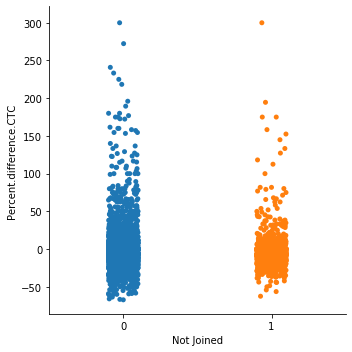

In [18]:
sns.catplot("Not Joined",'Percent.difference.CTC',data = df1)

- by this we can say that the person who have hike percent difference in positive the chances of joining is more.

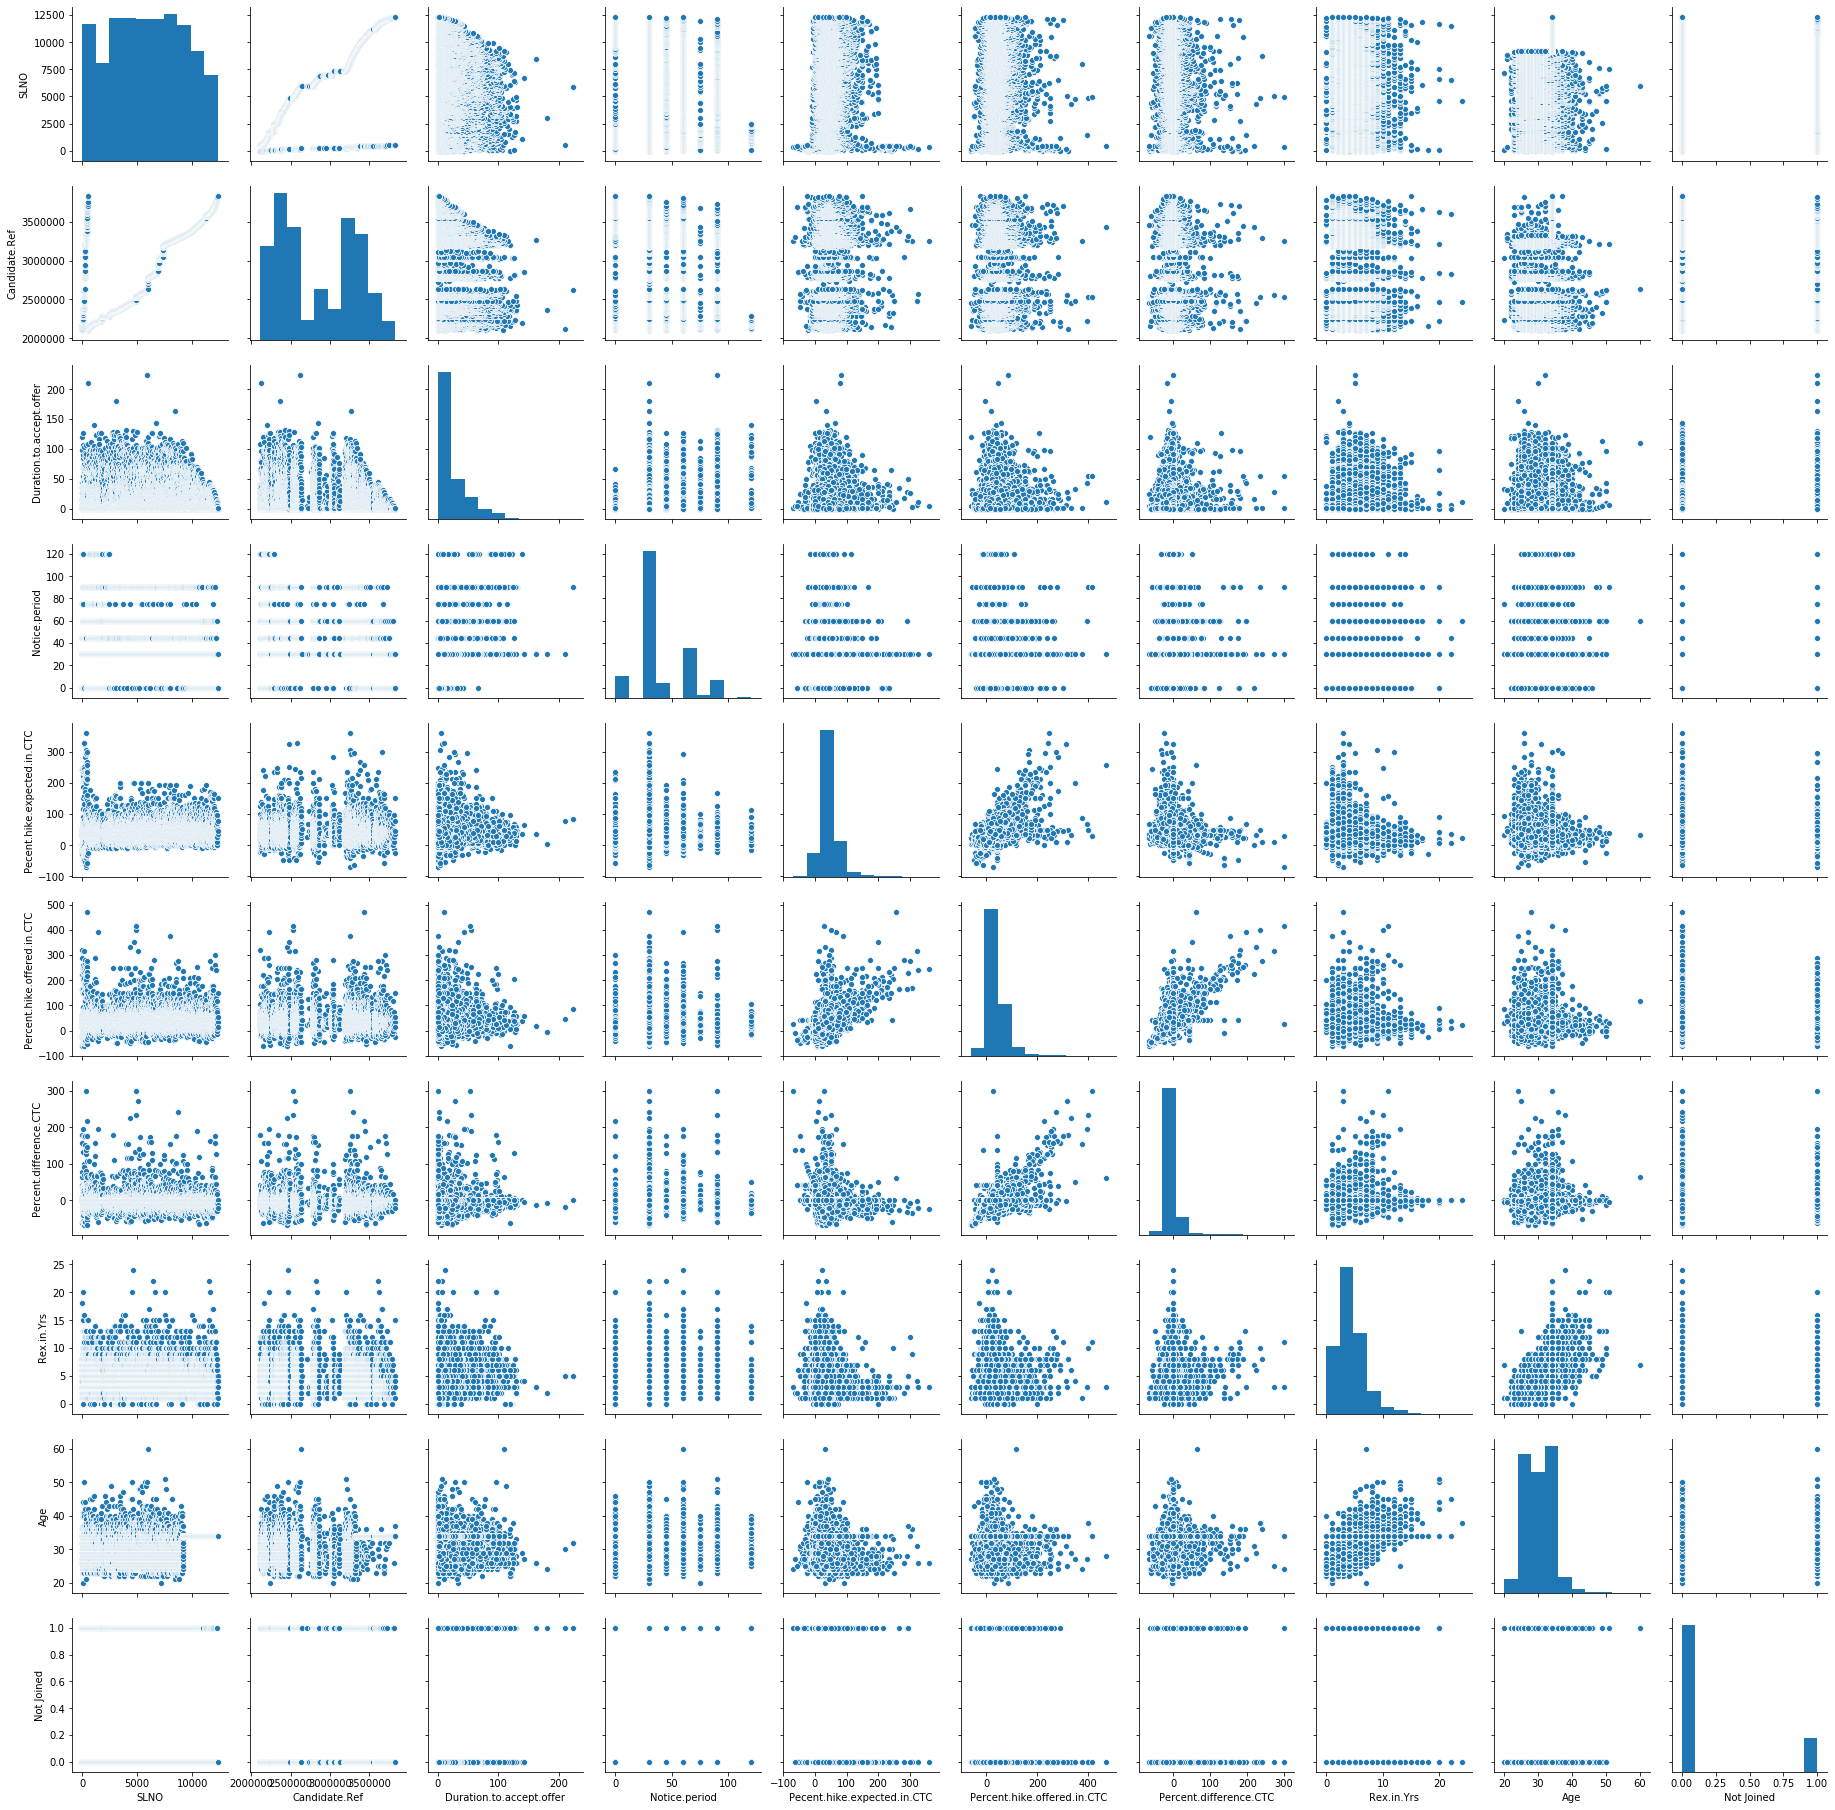

In [19]:
g= sns.pairplot(df1)

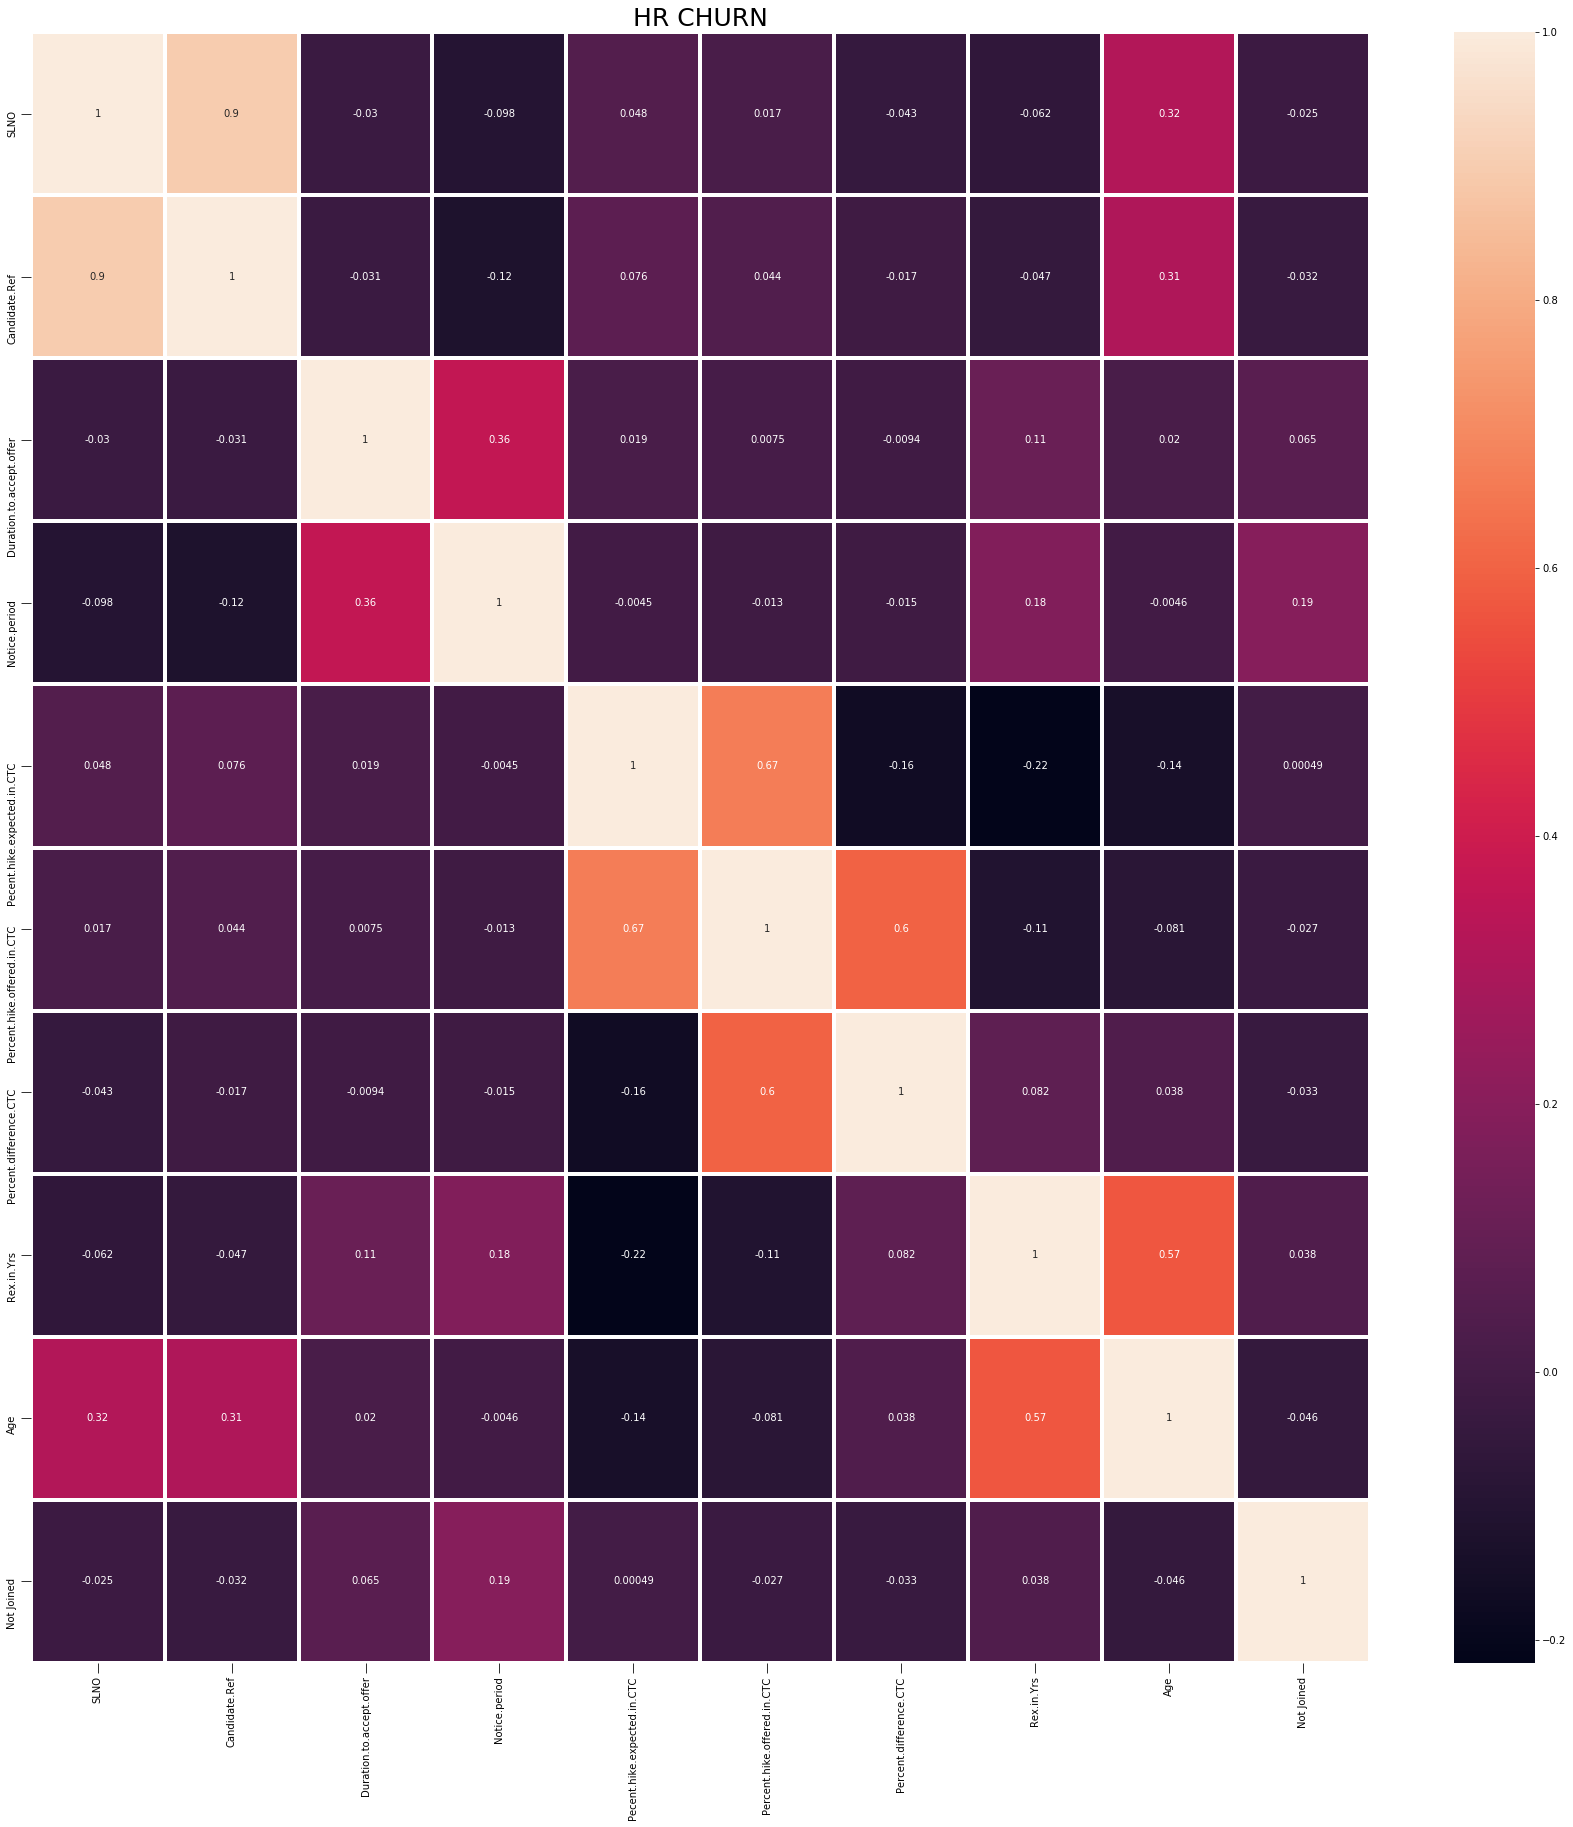

In [20]:
plt.figure(figsize=(30,30))
ax = sns.heatmap(df1.corr(), annot = True, linewidth = 3)
ax.tick_params(size = 10, labelsize = 10)
plt.title("HR CHURN", fontsize = 25)
plt.show()

#  Machine Learning Algorithm

> importing libraries

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
import warnings
warnings.filterwarnings('ignore')

#### Prepare Data for Classification

In [22]:
df2 = df1.copy()
df2

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status,Not Joined
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined,0
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined,0
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined,0
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined,0
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8989,12309,3822084,No,0,30,E1,50.00,50.00,0.00,No,No,Female,Agency,4,INFRA,Chennai,34,Not Joined,1
8991,12327,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,No,Female,Direct,3,BFSI,Chennai,34,Joined,0
8992,12331,3834159,No,0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined,0
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined,0


In [23]:
df2.drop(['Candidate.Ref'],axis=1, inplace=True)
df2

,SLNO,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status,Not Joined
0,1,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined,0
1,2,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined,0
2,3,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined,0
3,4,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined,0
4,5,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8989,12309,No,0,30,E1,50.00,50.00,0.00,No,No,Female,Agency,4,INFRA,Chennai,34,Not Joined,1
8991,12327,Yes,2,0,E1,150.00,150.00,0.00,No,No,Female,Direct,3,BFSI,Chennai,34,Joined,0
8992,12331,No,0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined,0
8993,12332,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined,0


In [24]:
df2.drop(['Location'],axis=1, inplace=True)

In [25]:
df2.drop(['Status'],axis = 1, inplace = True)

#### Converting categorical data to numerical.

In [26]:
df2 = pd.get_dummies(df2,drop_first=True)

In [27]:
df7= df2['Not Joined'].copy()
df7

0       0
1       0
2       0
3       0
4       0
       ..
8989    1
8991    0
8992    0
8993    0
8994    0
Name: Not Joined, Length: 8992, dtype: uint8

In [28]:
df2.drop(['Not Joined'],axis = 1, inplace = True)

In [29]:
df2 = pd.merge(df2, df7, left_index = True, right_index = True)

In [30]:
df2.drop(['SLNO'],axis = 1, inplace = True)
df2

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,DOJ.Extended_Yes,Offered.band_E1,Offered.band_E2,...,Candidate.Source_Employee Referral,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,Not Joined
0,14,30,-20.79,13.16,42.86,7,34,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,18,30,50.00,320.00,180.00,8,34,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,3,45,42.84,42.84,0.00,4,27,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,26,30,42.84,42.84,0.00,4,34,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1,120,42.59,42.59,0.00,6,34,1,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8989,0,30,50.00,50.00,0.00,4,34,0,1,0,...,0,0,0,0,0,0,0,1,0,1
8991,2,0,150.00,150.00,0.00,3,34,1,1,0,...,0,1,0,0,0,0,0,0,0,0
8992,0,0,35.42,35.42,0.00,5,34,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8993,0,30,76.92,53.85,-13.04,4,34,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8992 entries, 0 to 8994
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Duration.to.accept.offer            8992 non-null   int64  
 1   Notice.period                       8992 non-null   int64  
 2   Pecent.hike.expected.in.CTC         8992 non-null   float64
 3   Percent.hike.offered.in.CTC         8992 non-null   float64
 4   Percent.difference.CTC              8992 non-null   float64
 5   Rex.in.Yrs                          8992 non-null   int64  
 6   Age                                 8992 non-null   int64  
 7   DOJ.Extended_Yes                    8992 non-null   uint8  
 8   Offered.band_E1                     8992 non-null   uint8  
 9   Offered.band_E2                     8992 non-null   uint8  
 10  Offered.band_E3                     8992 non-null   uint8  
 11  Joining.Bonus_Yes                   8992 no

- converting all the numerical data to scaler units.

In [32]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [33]:
num_vars = ['Duration.to.accept.offer', 'Notice.period', 'Pecent.hike.expected.in.CTC', 'Percent.hike.offered.in.CTC', 'Percent.difference.CTC','Rex.in.Yrs', 'Age']

df2[num_vars] = sc.fit_transform(df2[num_vars])

In [34]:
list(zip(df2.columns))

[('Duration.to.accept.offer',),
 ('Notice.period',),
 ('Pecent.hike.expected.in.CTC',),
 ('Percent.hike.offered.in.CTC',),
 ('Percent.difference.CTC',),
 ('Rex.in.Yrs',),
 ('Age',),
 ('DOJ.Extended_Yes',),
 ('Offered.band_E1',),
 ('Offered.band_E2',),
 ('Offered.band_E3',),
 ('Joining.Bonus_Yes',),
 ('Candidate.relocate.actual_Yes',),
 ('Gender_Male',),
 ('Candidate.Source_Direct',),
 ('Candidate.Source_Employee Referral',),
 ('LOB_BFSI',),
 ('LOB_CSMP',),
 ('LOB_EAS',),
 ('LOB_ERS',),
 ('LOB_ETS',),
 ('LOB_Healthcare',),
 ('LOB_INFRA',),
 ('LOB_MMS',),
 ('Not Joined',)]

In [35]:
col = df2.columns
col

Index(['Duration.to.accept.offer', 'Notice.period',
       'Pecent.hike.expected.in.CTC', 'Percent.hike.offered.in.CTC',
       'Percent.difference.CTC', 'Rex.in.Yrs', 'Age', 'DOJ.Extended_Yes',
       'Offered.band_E1', 'Offered.band_E2', 'Offered.band_E3',
       'Joining.Bonus_Yes', 'Candidate.relocate.actual_Yes', 'Gender_Male',
       'Candidate.Source_Direct', 'Candidate.Source_Employee Referral',
       'LOB_BFSI', 'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS',
       'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS', 'Not Joined'],
      dtype='object')

In [36]:
X_sca = df2[col]

In [37]:
import statsmodels.api as sm  
X_sca = sm.add_constant(X_sca)

### VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_sca
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,278.66
4,Percent.hike.offered.in.CTC,25.05
3,Pecent.hike.expected.in.CTC,16.63
5,Percent.difference.CTC,14.24
10,Offered.band_E2,12.89
9,Offered.band_E1,12.32
23,LOB_INFRA,5.10
11,Offered.band_E3,5.00
20,LOB_ERS,4.14
17,LOB_BFSI,3.15


In [39]:
df2.drop(['LOB_MMS'],axis = 1, inplace = True)
df2.drop(['Gender_Male'],axis = 1, inplace = True)
df2.drop(['Joining.Bonus_Yes'],axis = 1, inplace = True)
df2.drop(['Candidate.relocate.actual_Yes'],axis = 1, inplace = True)
df2

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,DOJ.Extended_Yes,Offered.band_E1,Offered.band_E2,...,Candidate.Source_Direct,Candidate.Source_Employee Referral,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,Not Joined
0,0.062500,0.250,0.112086,0.138525,0.299861,0.291667,0.350,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.080357,0.250,0.277252,0.715336,0.673265,0.333333,0.350,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.013393,0.375,0.260546,0.194319,0.183162,0.166667,0.175,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.116071,0.250,0.260546,0.194319,0.183162,0.166667,0.350,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0.004464,1.000,0.259963,0.193849,0.183162,0.250000,0.350,1,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8989,0.000000,0.250,0.277252,0.207779,0.183162,0.166667,0.350,0,1,0,...,0,0,0,0,0,0,0,0,1,1
8991,0.008929,0.000,0.510569,0.395763,0.183162,0.125000,0.350,1,1,0,...,1,0,1,0,0,0,0,0,0,0
8992,0.000000,0.000,0.243234,0.180371,0.183162,0.208333,0.350,0,0,1,...,1,0,0,0,0,0,0,0,1,0
8993,0.000000,0.250,0.340061,0.215016,0.147657,0.166667,0.350,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [40]:
array = df2.values
X = array[:,0:-1]
Y = array[:,-1]

In [41]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=51)

> Importing ML models

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [43]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))

In [44]:
result = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=51)
    croresults = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    result.append(croresults)
    output = "%s: %f (%f)" % (name, croresults.mean(), croresults.std())
    print(output)

LR: 0.813284 (0.021427)
KNN: 0.792850 (0.017846)
DTC: 0.721114 (0.015653)
NB: 0.761712 (0.018086)
RFC: 0.814536 (0.018826)


- by this we can say that the best algorithm would be random forest.

In [45]:
RFC = RandomForestClassifier(n_estimators=42)
RFC.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=42,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

> pridiction

In [46]:
predictions = RFC.predict(X_test)

> accuracy score

In [47]:
print(accuracy_score(Y_test, predictions))

0.8243468593663146


> confusion matrix

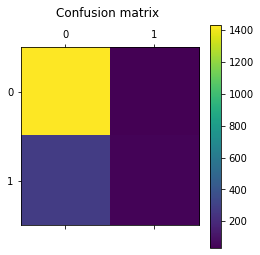

In [48]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix \n')
pl.colorbar()
pl.show()